<a href="https://colab.research.google.com/github/StefanHubner/MachineLearningEconomics/blob/main/Preliminaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# use install.packages if a package doesn't exist (only the first time, e.g. install.packages("foreign"))
library(foreign)
library(ggplot2)
library(dplyr)

d <- read.csv("https://raw.githubusercontent.com/StefanHubner/MachineLearningEconomics/main/econ_data.txt", sep = " ")
head(d)

countryinfo <- read.csv("https://raw.githubusercontent.com/StefanHubner/MachineLearningEconomics/main/country_info.txt", sep = " ")
head(countryinfo)

,country,year,pop,gdp,lfpr,unemplrate,secondary,highun,gdpcap,emplrate
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,Albania,1993,3193894,2.372e+09,NA,NA,NA,0,742.6671,NA
2,Albania,1994,3234573,2.595e+09,NA,NA,NA,0,802.2697,NA
3,Albania,1995,3265918,2.826e+09,NA,NA,NA,0,865.3004,NA
4,Albania,1996,3303659,3.084e+09,NA,NA,NA,0,933.5104,NA
5,Albania,1997,3339329,2.769e+09,NA,NA,NA,0,829.2085,NA
6,Albania,1998,3363893,3.121e+09,NA,NA,NA,0,927.7941,NA


,country,capital,area,euadmission
,<chr>,<chr>,<int>,<int>
1,Austria,Vienna,83858,1995
2,Belgium,Brussels,30510,1957
3,Bulgaria,Sofia,110912,2007
4,Cyprus,Nicosia,9250,2004
5,Czech Republic,Prague,78866,2004
6,Denmark,Copenhagen,43094,1973


In [24]:
head(d[d$country=="Austria",])
head(d[d$year==2006,])

,country,year,pop,gdp,lfpr,unemplrate,secondary,highun,gdpcap,emplrate
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
43,Austria,1993,7905633,1.603e+11,NA,4.0,NA,0,20276.68,NA
44,Austria,1994,7936118,1.646e+11,7110,3.8,NA,0,20740.62,6839.82
45,Austria,1995,7948278,1.677e+11,7140,3.9,68.9,0,21098.91,6861.54
46,Austria,1996,7959017,1.721e+11,7080,4.3,70.5,0,21623.27,6775.56
47,Austria,1997,7968041,1.753e+11,7090,4.4,73.1,0,22000.39,6778.04
48,Austria,1998,7976789,1.815e+11,7100,4.5,74.1,0,22753.52,6780.50


,country,year,pop,gdp,lfpr,unemplrate,secondary,highun,gdpcap,emplrate
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14,Albania,2006,3150884,5.034e+09,NA,NA,NA,0,1597.647,NA
28,Andorra,2006,79886,NA,NA,NA,NA,0,NA,NA
42,Armenia,2006,3222594,3.860e+09,NA,NA,NA,0,1197.793,NA
56,Austria,2006,8282424,2.152e+11,7370,4.7,80.3,0,25982.732,7023.61
70,Azerbaijan,2006,8484550,1.335e+10,NA,NA,NA,0,1573.448,NA
84,Belarus,2006,9732501,2.011e+10,NA,NA,NA,0,2066.273,NA


In [31]:
# new variable
d["highun"] <- as.double(d$unemplrate > 8 & !is.na(d$unemplrate))
d["gdpcap"] <- d$gdp / d$pop

# keep, drop
d.subset1 <- d[complete.cases(d),]
d.subset2 <- d[!is.na(d$unemplrate),]

# rename
names(d)[names(d)=="percentagewithsecondaryeduc"] <- "secondary"

# modified dataset
d.post1992 <- d[d$year>1992,]

# merge the two datasets
countryinfo$country <- trimws(countryinfo$country)
final <- left_join(d.post1992, countryinfo, by = "country")

# order by country and year
final <- final[order(final$country, final$year), ]

# dummy variable (1 if in eu in a given year)
final["eumember"] <- final$year >= final$euadmission
head(final[final$country=="Malta",])

,country,year,pop,gdp,lfpr,unemplrate,secondary,highun,gdpcap,emplrate,capital,area,euadmission,eumember
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<lgl>
393,Malta,1993,364704,2.766e+09,NA,NA,NA,0,7584.233,NA,Valletta,316,2004,FALSE
394,Malta,1994,367941,2.926e+09,NA,NA,NA,0,7952.362,NA,Valletta,316,2004,FALSE
395,Malta,1995,370433,3.107e+09,NA,NA,NA,0,8387.482,NA,Valletta,316,2004,FALSE
396,Malta,1996,372687,3.231e+09,NA,NA,NA,0,8669.473,NA,Valletta,316,2004,FALSE
397,Malta,1997,375236,3.386e+09,NA,NA,NA,0,9023.654,NA,Valletta,316,2004,FALSE
398,Malta,1998,377516,3.504e+09,NA,NA,NA,0,9281.726,NA,Valletta,316,2004,FALSE


In [26]:
aggregated.sums <- aggregate(final[c("pop", "area")], by=list(final$year), FUN=sum, na.rm = TRUE)
aggregated.means <- aggregate(final[c("gdpcap", "lfpr", "unemplrate", "secondary")], by=list(final$year), FUN=mean, na.rm = TRUE)

aggregated <- merge(aggregated.sums, aggregated.means) # weighted mean: easiest to pre-weight columns, then use sum or mean
names(aggregated)[names(aggregated)=="Group.1"] <- "year"
# generate, replace new variables (labour force participation rate)
d$lfpr <- d$lfpr * 100
d["emplrate"] <- (100 - d$unemplrate) * d$lfpr / 100
summary(d$lfpr)


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
50200000 63850000 69600000 69028775 72950000 87100000      293 

In [27]:
install.packages(c("ggrepel", "maps"))
library(ggrepel)
library(maps)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’




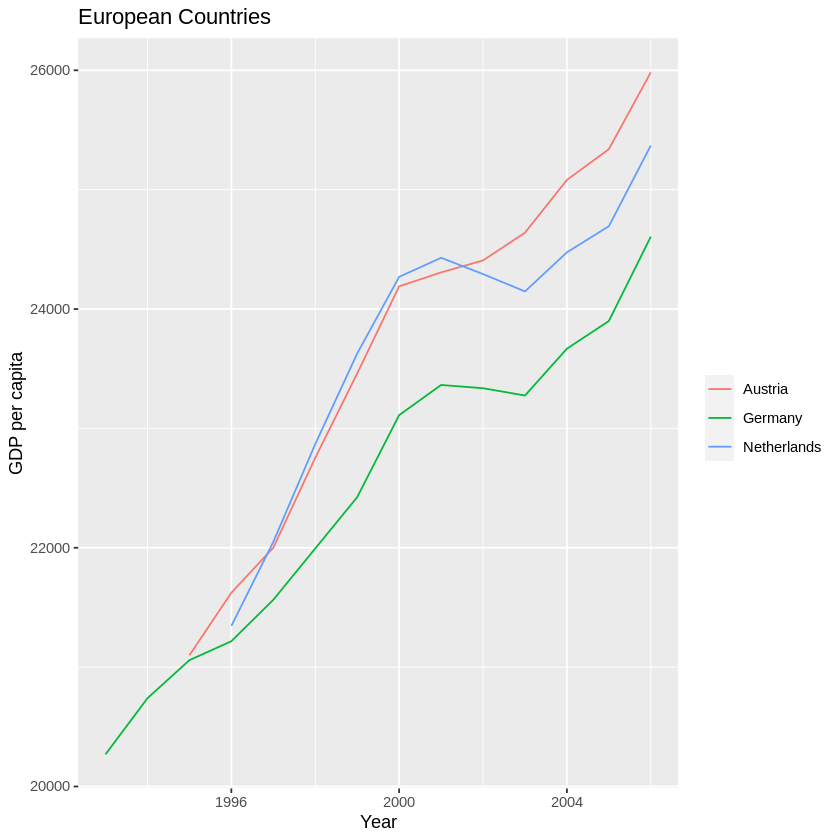

In [28]:
# plot for some countries
ggplot(d.subset1[d.subset1$country %in% c("Austria", "Germany", "Netherlands"),], aes(x=year, y=gdpcap)) +
  geom_line(aes(group=country, color=country)) +
  labs(title = "European Countries", x = "Year", y = "GDP per capita") +
  theme(legend.title=element_blank())

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


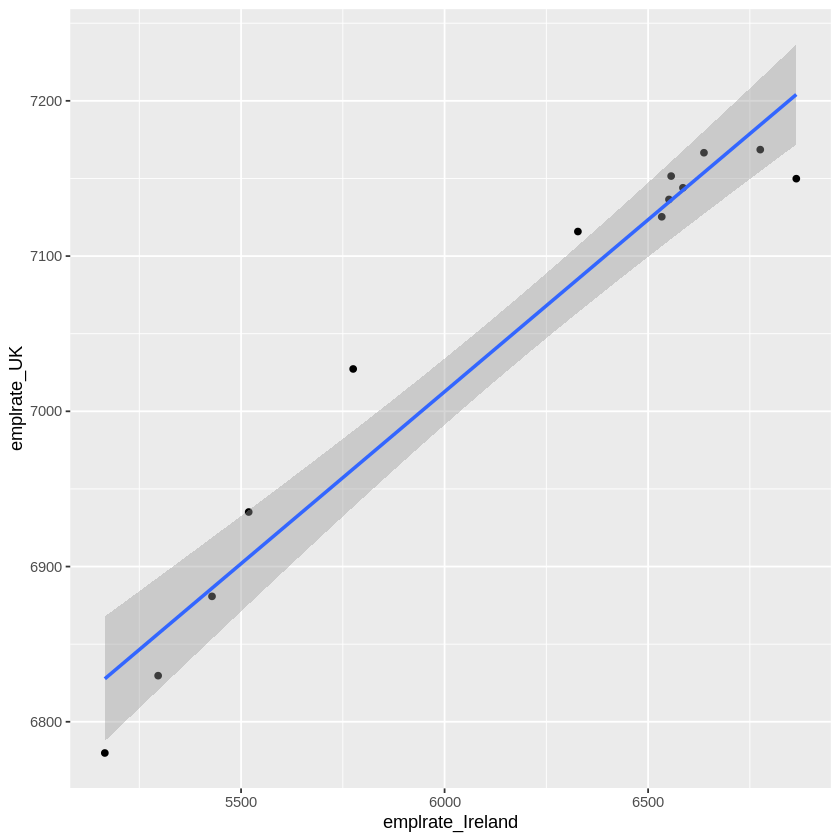

In [29]:
# some more plotting
wide <- reshape(d.subset1, idvar = "year", timevar = "country", direction = "wide", sep="_")
ggplot(wide, aes(x=emplrate_Ireland, y=emplrate_UK)) +
  geom_point() +
  geom_smooth(method=lm)

Warning message in left_join(d.subset2, df.map, by = "country"):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 8928 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


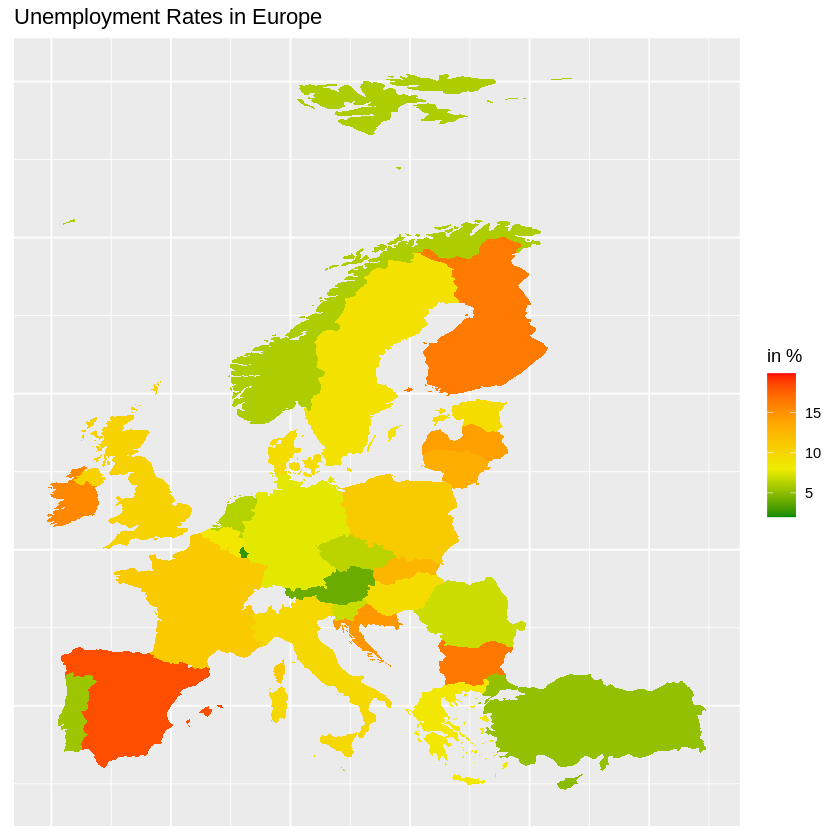

In [30]:
# plot it on a map
df.map <- map_data('world')
df.map["country"] <- df.map["region"]
d.ext <- left_join(d.subset2, df.map, by="country")
ggplot(d.ext, aes(x = long, y = lat, group = group)) +
  geom_polygon(aes(fill = unemplrate)) +
  labs(title = 'Unemployment Rates in Europe', fill = 'in %') +
  scale_fill_gradientn(colors = c('green4', 'yellow2', 'orange', 'red')) +
  theme(axis.title = element_blank(), axis.text = element_blank(), axis.ticks = element_blank())